In [49]:
import pandas as pd
import numpy as np

import ppscore as pps
from minepy import MINE

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [150]:
def print_stats(mine):
    print("MIC", mine.mic())
#     print("MAS", mine.mas())
#     print("MEV", mine.mev())
#     print("MCN (eps=0)", mine.mcn(0))
#     print("MCN (eps=1-MIC)", mine.mcn_general())
#     print("GMIC", mine.gmic())
#     print("TIC", mine.tic())

In [52]:
df.shape

(891, 11)

In [54]:
df.columns[1:]

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df = df.drop('PassengerId', axis=1)

In [27]:
df_matrix = pps.matrix(df)

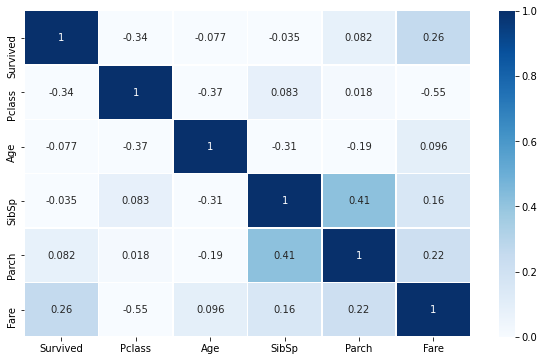

In [38]:
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

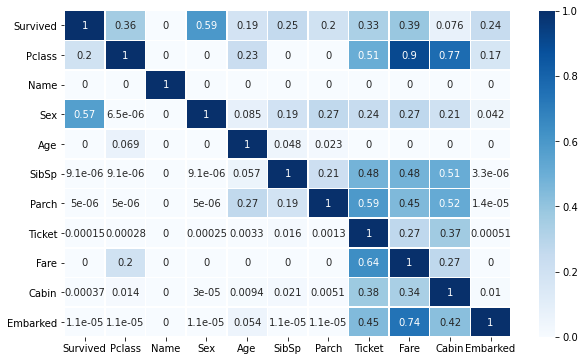

In [39]:
plt.subplots(figsize=(10,6))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# MINE can not be used for categorical values

In [41]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(df['Survived'], df['Fare'])
print_stats(mine)

MIC 0.2401931134683473
MAS 0.17187562714272847
MEV 0.2401931134683473
MCN (eps=0) 5.857980995127572
MCN (eps=1-MIC) 2.0
GMIC 0.17542428350984102
TIC 16.26764438396451


In [45]:
mine.compute_score(df['Survived'], df['Pclass'])
print_stats(mine)

MIC 0.08383104529601122
MAS 0.008037417859929688
MEV 0.08383104529601122
MCN (eps=0) 2.584962500721156
MCN (eps=1-MIC) 2.0
GMIC 0.08376375289091621
TIC 10.840650278995437


In [101]:
df_tmp = df.loc[:,df.dtypes!=object]

In [112]:
x = [df_tmp.iloc[:,0],df_tmp.iloc[:,1], df_tmp.iloc[:,2], df_tmp.iloc[:,3], df_tmp.iloc[:,4], df_tmp.iloc[:,5]]

In [113]:
y = df.Survived

In [151]:
for i,xi in enumerate(x):
    print("===",df_tmp.columns[i],"===against=== Survived", )
    mine.compute_score(xi, y)
    print_stats(mine)
    print("-------------------")

=== Survived ===against=== Survived
MIC 0.9607079018756468
-------------------
=== Pclass ===against=== Survived
MIC 0.08383104529601122
-------------------
=== Age ===against=== Survived
MIC 0.1237438107228469
-------------------
=== SibSp ===against=== Survived
MIC 0.03346632133870942
-------------------
=== Parch ===against=== Survived
MIC 0.023610547633470813
-------------------
=== Fare ===against=== Survived
MIC 0.2401931134683473
-------------------
